# First is to obtain the data ( OSEMN ) and import all necessary libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as mtplb

In [3]:
df = pd.read_csv('earthquakes_2023_global.csv')


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


# We start with the scrubbing process where we filter all unnecessary data

In [4]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,2023-12-29T03:37:19.334Z,-6.9527,154.9829,10.000,5.20,mb,72.0,60.0,3.9240,0.93,...,2023-12-29T04:05:57.040Z,"89 km SW of Panguna, Papua New Guinea",earthquake,10.07,1.765,0.048,141.0,reviewed,us,us
26638,2023-12-29T04:38:54.109Z,32.3262,141.7386,10.000,5.10,mb,74.0,121.0,1.8030,0.70,...,2023-12-29T10:59:44.533Z,"Izu Islands, Japan region",earthquake,9.17,1.870,0.042,187.0,reviewed,us,us
26639,2023-12-29T08:42:05.747Z,-7.2411,68.0663,10.000,5.10,mb,60.0,54.0,12.7760,0.57,...,2023-12-29T08:57:05.040Z,Chagos Archipelago region,earthquake,8.02,1.792,0.090,40.0,reviewed,us,us
26640,2023-12-29T11:02:48.679Z,-19.1602,169.0428,153.264,4.70,mb,40.0,61.0,3.7460,0.82,...,2023-12-29T11:22:46.040Z,"49 km NNW of Isangel, Vanuatu",earthquake,8.52,7.433,0.081,46.0,reviewed,us,us


In [5]:
df.type.unique()

array(['earthquake', 'mining explosion', 'quarry blast', 'ice quake',
       'explosion', 'Landslide', 'volcanic eruption', 'landslide'],
      dtype=object)

<Axes: xlabel='type', ylabel='mag'>

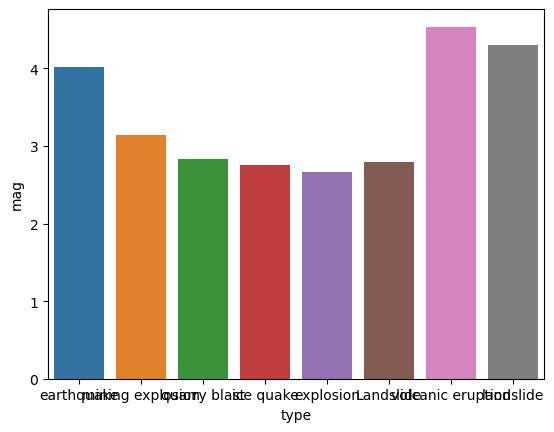

In [9]:
sns.barplot(data=df, x='type', y='mag', errorbar=None)

<Axes: xlabel='type', ylabel='magType'>

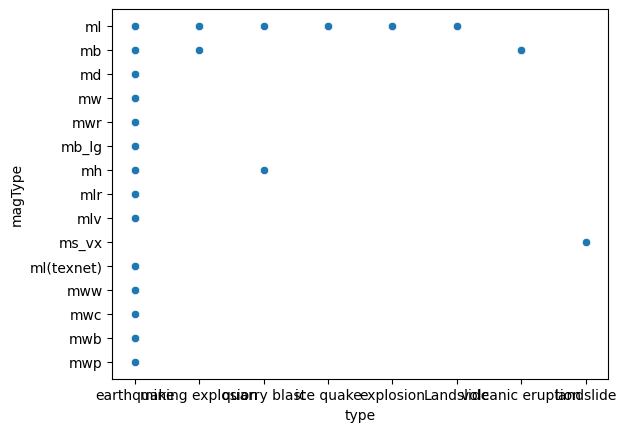

In [10]:
sns.scatterplot(data=df, x='type', y='magType')


In [5]:
df = df.drop(['type'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  horizontalError  25093 non-null  float64
 15  depthError       26642 non-null  float64
 16  magError         24970 non-null  float64
 17  magNst      

In [6]:
df.loc[df['magError'].isna()]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
13,2023-01-01T06:49:10.190Z,36.595000,-121.206333,7.740,3.9,mw,70.0,72.0,0.02872,0.13,...,nc73827436,2023-04-05T16:10:51.335Z,"9km NW of Pinnacles, CA",0.16,0.330,NaN,5.0,reviewed,nc,nc
77,2023-01-02T06:51:59.485Z,63.149300,-150.422600,106.500,2.6,ml,NaN,NaN,NaN,0.51,...,ak0233eycoy,2023-03-11T22:51:31.040Z,"74 km NNE of Petersville, Alaska",NaN,0.200,NaN,NaN,reviewed,ak,ak
83,2023-01-02T07:42:32.356Z,59.834300,-153.407600,128.000,2.7,ml,NaN,NaN,NaN,0.44,...,ak0233fhsrb,2023-03-11T22:51:31.040Z,"39 km E of Pedro Bay, Alaska",NaN,0.200,NaN,NaN,reviewed,ak,ak
85,2023-01-02T08:27:17.546Z,59.929000,-151.580500,65.800,3.1,ml,NaN,NaN,NaN,0.66,...,ak0233fzzfo,2023-03-11T22:51:32.040Z,"8 km ESE of Happy Valley, Alaska",NaN,0.300,NaN,NaN,reviewed,ak,ak
96,2023-01-02T10:36:41.974Z,60.261400,-153.429000,159.200,2.7,ml,NaN,NaN,NaN,0.58,...,ak0233h8ty7,2023-03-11T22:51:32.040Z,"49 km E of Port Alsworth, Alaska",NaN,0.300,NaN,NaN,reviewed,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25719,2023-11-30T03:05:37.766Z,-21.251500,-68.795100,115.909,4.5,mwr,50.0,54.0,0.67900,0.89,...,us7000lepj,2023-12-20T05:17:15.274Z,"56 km W of Ollagüe, Chile",5.01,5.239,NaN,NaN,reviewed,us,guc
25743,2023-12-01T05:50:26.249Z,62.957400,-150.435100,101.700,5.1,mww,NaN,NaN,NaN,0.71,...,ak023fe4b796,2023-12-29T06:00:32.965Z,"54 km NNE of Petersville, Alaska",NaN,0.300,NaN,NaN,reviewed,ak,ak
25744,2023-12-01T07:43:27.480Z,32.751833,-115.872833,8.690,4.8,mw,95.0,29.0,0.11210,0.26,...,ci39720706,2023-12-13T13:00:26.829Z,"11 km E of Ocotillo, CA",0.17,0.560,NaN,6.0,reviewed,ci,ci
26247,2023-12-09T04:49:44.451Z,-45.765400,-75.815500,9.704,5.2,mww,34.0,116.0,1.73400,0.61,...,us7000lhnw,2023-12-29T04:22:58.040Z,"236 km W of Puerto Chacabuco, Chile",8.16,4.005,NaN,NaN,reviewed,us,guc


In [7]:
df['place'].isna().sum()

1608

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  horizontalError  25093 non-null  float64
 15  depthError       26642 non-null  float64
 16  magError         24970 non-null  float64
 17  magNst      

In [9]:
df_new = df.loc[~df['place'].isna()]

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25034 entries, 0 to 26641
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             25034 non-null  object 
 1   latitude         25034 non-null  float64
 2   longitude        25034 non-null  float64
 3   depth            25034 non-null  float64
 4   mag              25034 non-null  float64
 5   magType          25034 non-null  object 
 6   nst              23666 non-null  float64
 7   gap              23664 non-null  float64
 8   dmin             23240 non-null  float64
 9   rms              25034 non-null  float64
 10  net              25034 non-null  object 
 11  id               25034 non-null  object 
 12  updated          25034 non-null  object 
 13  place            25034 non-null  object 
 14  horizontalError  23539 non-null  float64
 15  depthError       25034 non-null  float64
 16  magError         23413 non-null  float64
 17  magNst      

In [11]:
df_new.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,us7000j5a1,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,us7000j3xk,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,pr2023001000,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,us7000j3xm,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,us7000j1zd,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999,0.085,18.0,reviewed,us,us


In [12]:
df.aggregate(['mean'])

/var/folders/zm/5xqrxr8j7fq9dv2fxm7rh6sh0000gn/T/ipykernel_21277/2855992873.py:1: FutureWarning: ['time', 'magType', 'net', 'id', 'updated', 'place', 'status', 'locationSource', 'magSource'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.aggregate(['mean'])


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939


In [13]:
df_new['nst'] = df_new['nst'].fillna(42.571332)
df_new['gap'] = df_new['gap'].fillna(124.930971)
df_new['dmin'] = df_new['dmin'].fillna(2.692908)
df_new['horizontalError'] = df_new['horizontalError'].fillna(7.017267)
df_new['magError'] = df_new['magError'].fillna(0.122735)
df_new['magNst'] = df_new['magNst'].fillna(33.315939)

/var/folders/zm/5xqrxr8j7fq9dv2fxm7rh6sh0000gn/T/ipykernel_21277/1667052036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['nst'] = df_new['nst'].fillna(42.571332)
/var/folders/zm/5xqrxr8j7fq9dv2fxm7rh6sh0000gn/T/ipykernel_21277/1667052036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gap'] = df_new['gap'].fillna(124.930971)
/var/folders/zm/5xqrxr8j7fq9dv2fxm7rh6sh0000gn/T/ipykernel_21277/1667052036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25034 entries, 0 to 26641
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             25034 non-null  object 
 1   latitude         25034 non-null  float64
 2   longitude        25034 non-null  float64
 3   depth            25034 non-null  float64
 4   mag              25034 non-null  float64
 5   magType          25034 non-null  object 
 6   nst              25034 non-null  float64
 7   gap              25034 non-null  float64
 8   dmin             25034 non-null  float64
 9   rms              25034 non-null  float64
 10  net              25034 non-null  object 
 11  id               25034 non-null  object 
 12  updated          25034 non-null  object 
 13  place            25034 non-null  object 
 14  horizontalError  25034 non-null  float64
 15  depthError       25034 non-null  float64
 16  magError         25034 non-null  float64
 17  magNst      

In [15]:
df_new = df_new.drop(['id', 'status'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25034 entries, 0 to 26641
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             25034 non-null  object 
 1   latitude         25034 non-null  float64
 2   longitude        25034 non-null  float64
 3   depth            25034 non-null  float64
 4   mag              25034 non-null  float64
 5   magType          25034 non-null  object 
 6   nst              25034 non-null  float64
 7   gap              25034 non-null  float64
 8   dmin             25034 non-null  float64
 9   rms              25034 non-null  float64
 10  net              25034 non-null  object 
 11  updated          25034 non-null  object 
 12  place            25034 non-null  object 
 13  horizontalError  25034 non-null  float64
 14  depthError       25034 non-null  float64
 15  magError         25034 non-null  float64
 16  magNst           25034 non-null  float64
 17  locationSour

In [16]:
df_new.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,21.213,0.097,14.0,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445,0.083,43.0,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,15.950,0.090,16.0,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579,0.238,5.0,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999,0.085,18.0,us,us


In [17]:
df.locationSource = df.magSource

In [18]:
df_new.loc[(df.locationSource == df.magSource) != True].shape

(0, 19)

In [19]:
df_new = df_new.drop(['locationSource'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25034 entries, 0 to 26641
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             25034 non-null  object 
 1   latitude         25034 non-null  float64
 2   longitude        25034 non-null  float64
 3   depth            25034 non-null  float64
 4   mag              25034 non-null  float64
 5   magType          25034 non-null  object 
 6   nst              25034 non-null  float64
 7   gap              25034 non-null  float64
 8   dmin             25034 non-null  float64
 9   rms              25034 non-null  float64
 10  net              25034 non-null  object 
 11  updated          25034 non-null  object 
 12  place            25034 non-null  object 
 13  horizontalError  25034 non-null  float64
 14  depthError       25034 non-null  float64
 15  magError         25034 non-null  float64
 16  magNst           25034 non-null  float64
 17  magSource   

In [20]:
df_new.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,21.213,0.097,14.0,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445,0.083,43.0,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,15.950,0.090,16.0,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579,0.238,5.0,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999,0.085,18.0,us


In [21]:
df_new.loc[(df.net == df.magSource) != True].head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
174,2023-01-03T14:33:56.324Z,53.2420,-160.6759,10.000,2.6,ml,12.0,323.0,1.986,0.50,us,2023-03-11T22:51:53.040Z,"229 km SSE of King Cove, Alaska",4.98,2.028,0.122735,33.315939,ak
235,2023-01-04T15:29:37.261Z,-23.0579,-68.9523,106.604,4.5,mwr,30.0,81.0,0.670,0.72,us,2023-03-11T22:51:39.040Z,"66 km S of Calama, Chile",1.85,5.035,0.122735,33.315939,guc
277,2023-01-05T14:14:29.033Z,-22.8646,-68.4422,122.519,4.4,mwr,32.0,53.0,0.258,0.70,us,2023-03-11T22:51:41.040Z,"25 km WNW of San Pedro de Atacama, Chile",5.06,4.431,0.122735,33.315939,guc
284,2023-01-05T19:08:18.930Z,-32.7048,-71.2694,57.962,4.2,mwr,41.0,99.0,0.449,0.41,us,2023-03-11T22:51:41.040Z,"10 km NNW of Hacienda La Calera, Chile",2.80,5.178,0.122735,33.315939,guc
431,2023-01-08T20:23:58.691Z,-21.0474,-68.6382,128.382,4.3,mwr,25.0,73.0,0.793,1.11,us,2023-03-20T06:03:01.040Z,"158 km N of Calama, Chile",6.46,1.851,0.122735,33.315939,guc


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25034 entries, 0 to 26641
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             25034 non-null  object 
 1   latitude         25034 non-null  float64
 2   longitude        25034 non-null  float64
 3   depth            25034 non-null  float64
 4   mag              25034 non-null  float64
 5   magType          25034 non-null  object 
 6   nst              25034 non-null  float64
 7   gap              25034 non-null  float64
 8   dmin             25034 non-null  float64
 9   rms              25034 non-null  float64
 10  net              25034 non-null  object 
 11  updated          25034 non-null  object 
 12  place            25034 non-null  object 
 13  horizontalError  25034 non-null  float64
 14  depthError       25034 non-null  float64
 15  magError         25034 non-null  float64
 16  magNst           25034 non-null  float64
 17  magSource   

In [23]:
df_new.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,21.213,0.097,14.0,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445,0.083,43.0,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,15.950,0.090,16.0,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579,0.238,5.0,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999,0.085,18.0,us


# Exploratory Analysis and Visualizations

In [24]:
df_new.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,21.213,0.097,14.0,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445,0.083,43.0,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,15.950,0.090,16.0,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579,0.238,5.0,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999,0.085,18.0,us


<Axes: xlabel='magType', ylabel='mag'>

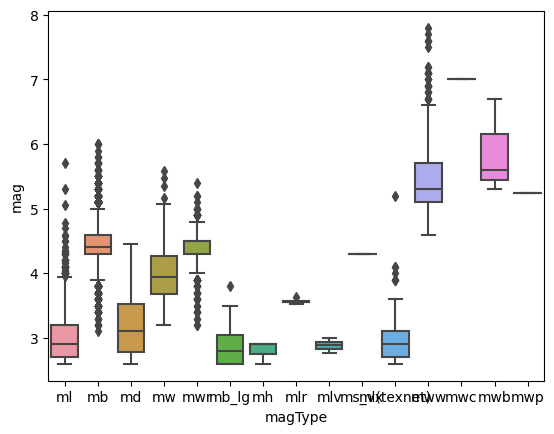

In [25]:
seaborn.boxplot(data=df_new, x='magType', y='mag',)

In [26]:
df.magType.values

array(['ml', 'mb', 'md', ..., 'mb', 'mb', 'mb'], dtype=object)

In [27]:
len(df_new[df_new.magType == 'mww'])

1129

In [28]:
 df_grouped = df_new.groupby(['magType'])

In [29]:
df_grouped[['mag', 'depth',]].aggregate(['max', 'mean'])

mag               depth           
             max      mean       max       mean
magType                                        
mb          6.00  4.432464  681.2380  87.951698
mb_lg       3.80  2.872727   19.8210   7.177400
md          4.45  3.171306  189.0000  29.913752
mh          2.90  2.800000   12.8700   7.943333
ml          5.70  2.973240  262.4230  33.023386
ml(texnet)  5.20  2.967790   14.6484   6.507841
mlr         3.63  3.567500   19.7000  10.825000
mlv         3.00  2.885809    7.7769   5.874497
ms_vx       4.30  4.300000    0.0000   0.000000
mw          5.58  4.043908   31.9300   9.593103
mwb         6.70  5.866667   10.0000  10.000000
mwc         7.00  7.000000   29.7080  29.708000
mwp         5.25  5.250000   10.0000  10.000000
mwr         5.40  4.401014  253.9120  45.672583
mww         7.80  5.440124  622.6800  60.385588

In [30]:
df_mw = df_new.loc[df['magType'] == 'mw']
# the fact that there is only one entry for ms_vx explains this fact


<Axes: xlabel='depth', ylabel='mag'>

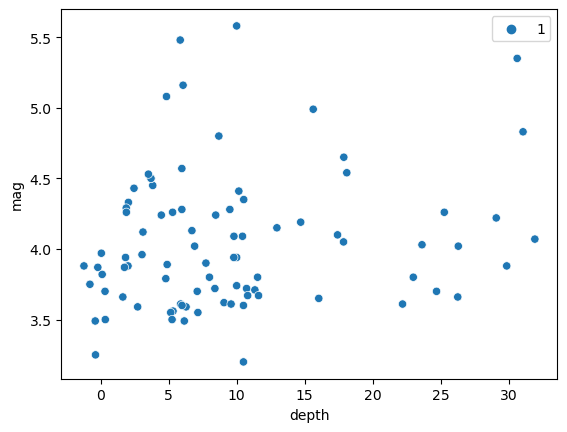

In [31]:
seaborn.scatterplot(data=df_mw, x='depth', y='mag', hue=1)
# I won't say that there is a significant pattern observable here

<Axes: xlabel='depth', ylabel='mag'>

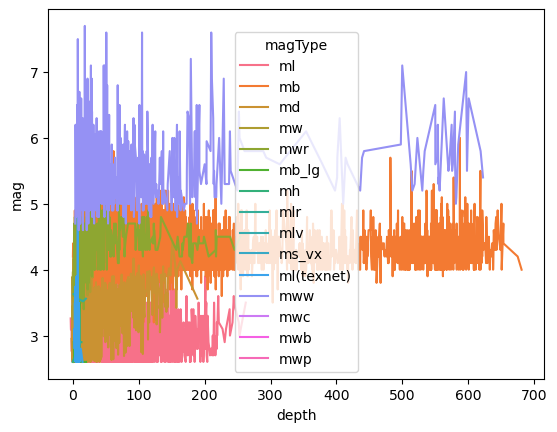

In [32]:
seaborn.lineplot(data=df_new, x='depth', y='mag', hue='magType', errorbar=None, estimator='median')

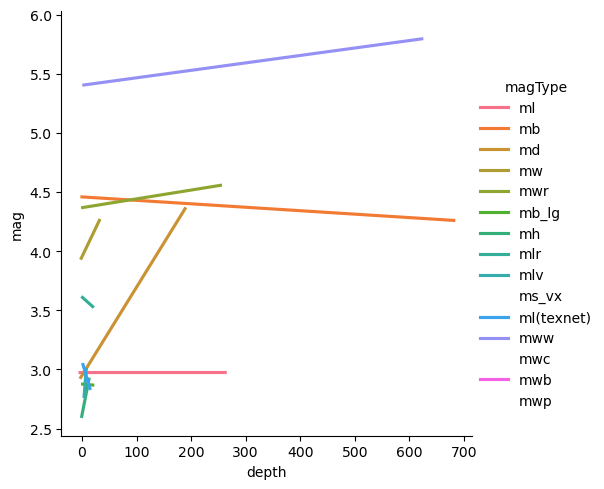

In [33]:
seaborn.lmplot(data=df_new, x='depth', y='mag', hue='magType', scatter=False, ci=None)

<Axes: xlabel='latitude', ylabel='longitude'>

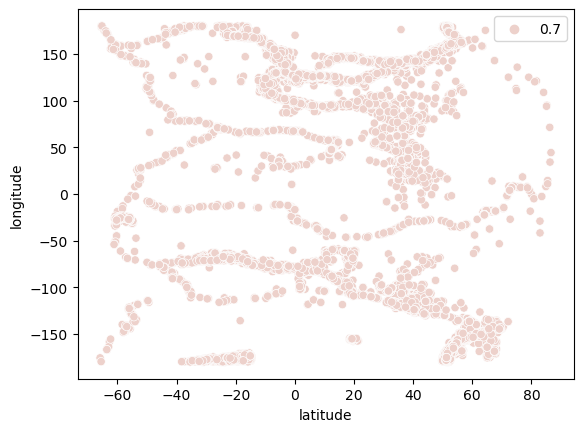

In [34]:
seaborn.scatterplot(data=df_new, x='latitude', y='longitude', hue=0.7)

In [35]:
df_new

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,21.213,0.097,14.0,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445,0.083,43.0,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,15.950,0.090,16.0,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579,0.238,5.0,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999,0.085,18.0,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,2023-12-29T03:37:19.334Z,-6.9527,154.9829,10.000,5.20,mb,72.0,60.0,3.9240,0.93,us,2023-12-29T04:05:57.040Z,"89 km SW of Panguna, Papua New Guinea",10.07,1.765,0.048,141.0,us
26638,2023-12-29T04:38:54.109Z,32.3262,141.7386,10.000,5.10,mb,74.0,121.0,1.8030,0.70,us,2023-12-29T10:59:44.533Z,"Izu Islands, Japan region",9.17,1.870,0.042,187.0,us
26639,2023-12-29T08:42:05.747Z,-7.2411,68.0663,10.000,5.10,mb,60.0,54.0,12.7760,0.57,us,2023-12-29T08:57:05.040Z,Chagos Archipelago region,8.02,1.792,0.090,40.0,us
26640,2023-12-29T11:02:48.679Z,-19.1602,169.0428,153.264,4.70,mb,40.0,61.0,3.7460,0.82,us,2023-12-29T11:22:46.040Z,"49 km NNW of Isangel, Vanuatu",8.52,7.433,0.081,46.0,us


In [36]:
import folium
# using folium we will plot all those points where important features of earthquakes have been noticed this year
# 1) location with highest magnitude in each of the magTypes
# 2) location with most number of earthquakes is nearby regions 
### the explanaotry visualitization could be to put markers for all the features in one map itself
### the explanatory visulaization could be to have a restricted zoom on the region in question


In [37]:
final_df = df_new.sort_values(by=['mag'], ascending=False)
final_df
# note that the maximum magnitude earthquakes were calculated on the basis of the magType = mww

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
19930,2023-02-06T01:17:34.342Z,37.225600,37.014300,10.000000,7.8,mww,266.000000,17.000000,0.165000,0.66,us,2023-12-17T21:35:55.383Z,"Pazarcik earthquake, Kahramanmaras earthquake ...",5.230000,1.784000,0.050000,38.000000,us
21909,2023-05-19T02:57:03.172Z,-23.206300,170.742300,18.053000,7.7,mww,278.000000,15.000000,3.096000,0.89,us,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,7.070000,2.580000,0.035000,79.000000,us
19384,2023-01-09T17:47:35.037Z,-7.058600,130.009000,104.950000,7.6,mww,113.000000,21.000000,1.574000,0.80,us,2023-04-05T16:41:13.472Z,"Pulau Pulau Tanimbar, Indonesia",6.900000,2.259000,0.041000,58.000000,us
21762,2023-05-10T16:02:00.334Z,-15.627800,-174.492500,210.000000,7.6,mww,380.000000,15.000000,3.744000,0.70,us,2023-07-22T19:16:37.040Z,"82 km WNW of Hihifo, Tonga",7.370000,1.841000,0.055000,32.000000,us
25770,2023-12-02T14:37:05.568Z,8.487000,126.351100,50.675000,7.6,mww,129.000000,43.000000,7.731000,0.93,us,2023-12-28T19:39:10.414Z,"12 km N of Hinatuan, Philippines",8.420000,2.945000,0.028000,124.000000,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2023-01-26T10:12:17.888Z,42.487300,-125.985700,10.000000,2.6,ml,23.000000,282.000000,1.473000,0.65,us,2023-04-11T18:51:33.040Z,"125 km WSW of Port Orford, Oregon",4.230000,2.025000,0.048000,58.000000,us
4522,2023-03-19T06:29:10.162Z,53.956100,-164.024400,35.000000,2.6,ml,23.000000,214.000000,0.676000,0.34,us,2023-05-26T21:54:21.040Z,"107 km SSW of False Pass, Alaska",2.690000,2.011000,0.105000,12.000000,us
1425,2023-01-26T10:47:42.574Z,32.752991,-100.659418,6.089233,2.6,ml,20.000000,70.000000,0.080612,0.20,tx,2023-04-11T18:51:34.040Z,"16 km NE of Hermleigh, Texas",0.951982,1.238305,0.100000,13.000000,tx
7879,2023-05-22T01:08:43.526Z,54.751000,-161.777600,53.093000,2.6,ml,19.000000,203.000000,0.386000,0.29,us,2023-07-29T22:00:39.040Z,"48 km SE of King Cove, Alaska",7.130000,14.121000,0.128000,8.000000,us


In [38]:
# just in case someone wants to see the maximum magnitude earthquakes  with lat and long of each magType
df_grouped[['mag']].aggregate('max').T


magType,mb,mb_lg,md,mh,ml,ml(texnet),mlr,mlv,ms_vx,mw,mwb,mwc,mwp,mwr,mww
mag,6.0,3.8,4.45,2.9,5.7,5.2,3.63,3.0,4.3,5.58,6.7,7.0,5.25,5.4,7.8


In [39]:
df.loc[(df['mag'] == 6.0) & (df['magType'] == 'mb')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
19984,2023-02-06T10:26:46.742Z,38.0315,38.0984,10.000,6.0,mb,65.0,63.0,1.111,0.88,...,us6000jm1y,2023-04-15T21:39:40.040Z,"12 km W of Çelikhan, Turkey",4.28,1.605,0.081,57.0,reviewed,us,us
20002,2023-02-06T12:02:11.275Z,38.0582,36.5114,8.516,6.0,mb,138.0,25.0,0.356,0.54,...,us6000jlrc,2023-04-15T21:39:37.040Z,"4 km NNE of Göksun, Turkey",4.32,3.954,0.024,647.0,reviewed,us,us
21546,2023-04-28T03:13:44.419Z,-25.1471,178.5065,587.560,6.0,mb,113.0,23.0,5.170,0.94,...,us7000jwhc,2023-07-11T01:45:46.040Z,south of the Fiji Islands,9.60,3.635,0.023,676.0,reviewed,us,us


In [40]:
df.loc[(df['mag'] == 3.8) & (df['magType'] == 'mb_lg')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2088,2023-02-06T11:15:49.769Z,42.8605,-78.7853,5.677,3.8,mb_lg,23.0,114.0,0.389,0.47,...,us6000jlqv,2023-12-28T00:35:03.177Z,"1 km NE of West Seneca, New York",2.18,7.439,0.208,6.0,reviewed,us,us


In [41]:
df.loc[(df['mag'] == 4.45) & (df['magType'] == 'md')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
15902,2023-10-23T12:58:02.440Z,17.9988,-66.8058,10.0,4.45,md,17.0,171.0,0.239,0.19,...,pr2023296001,2023-10-30T05:30:10.040Z,Puerto Rico region,0.68,0.85,0.19,9.0,reviewed,pr,pr


In [42]:
df.loc[(df['mag'] == 2.9) & (df['magType'] == 'mh')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
5303,2023-04-04T08:10:26.100Z,37.444833,-119.015667,11.35,2.9,mh,10.0,77.0,0.1475,0.05,...,nc73866660,2023-04-04T22:46:15.144Z,"22km S of Mammoth Lakes, CA",0.34,0.87,NaN,0.0,reviewed,nc,nc
13263,2023-09-02T18:10:00.140Z,35.991333,-120.122167,12.87,2.9,mh,24.0,241.0,0.1415,0.07,...,nc73932271,2023-09-08T02:36:14.523Z,"2 km SSE of Avenal, CA",0.58,0.82,NaN,0.0,reviewed,nc,nc


In [43]:
df.loc[(df['mag'] == 5.7) & (df['magType'] == 'ml')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
26263,2023-12-09T14:27:22.410Z,18.8785,-64.3833,7.0,5.7,ml,26.0,222.0,0.5198,0.21,...,pr2023343002,2023-12-29T14:42:38.958Z,"74 km NE of Cruz Bay, U.S. Virgin Islands",0.79,0.82,0.16,17.0,reviewed,pr,pr


In [44]:
df.loc[(df['mag'] == 5.2) & (df['magType'] == 'ml(texnet)')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
25193,2023-11-08T10:27:49.034Z,31.622,-103.982,7.417,5.2,ml(texnet),31.0,52.0,0.0,0.2,...,tx2023vxae,2023-12-27T10:38:00.205Z,"Coalson Draw, Texas",0.630666,0.841958,0.2,41.0,reviewed,tx,tx


In [45]:
df.loc[(df['mag'] == 6.0) & (df['magType'] == 'mb')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
19984,2023-02-06T10:26:46.742Z,38.0315,38.0984,10.000,6.0,mb,65.0,63.0,1.111,0.88,...,us6000jm1y,2023-04-15T21:39:40.040Z,"12 km W of Çelikhan, Turkey",4.28,1.605,0.081,57.0,reviewed,us,us
20002,2023-02-06T12:02:11.275Z,38.0582,36.5114,8.516,6.0,mb,138.0,25.0,0.356,0.54,...,us6000jlrc,2023-04-15T21:39:37.040Z,"4 km NNE of Göksun, Turkey",4.32,3.954,0.024,647.0,reviewed,us,us
21546,2023-04-28T03:13:44.419Z,-25.1471,178.5065,587.560,6.0,mb,113.0,23.0,5.170,0.94,...,us7000jwhc,2023-07-11T01:45:46.040Z,south of the Fiji Islands,9.60,3.635,0.023,676.0,reviewed,us,us


In [46]:
df_new['place'].str.split(pat = ',' , expand = True)

,0,1,2
0,Rat Islands,Aleutian Islands,Alaska
1,23 km ESE of Manay,Philippines,None
2,Puerto Rico region,None,None
3,99 km SSW of Pagar Alam,Indonesia,None
4,59 km SSW of Unalaska,Alaska,None
...,...,...,...
26637,89 km SW of Panguna,Papua New Guinea,None
26638,Izu Islands,Japan region,None
26639,Chagos Archipelago region,None,None
26640,49 km NNW of Isangel,Vanuatu,None


In [47]:
final_df



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
19930,2023-02-06T01:17:34.342Z,37.225600,37.014300,10.000000,7.8,mww,266.000000,17.000000,0.165000,0.66,us,2023-12-17T21:35:55.383Z,"Pazarcik earthquake, Kahramanmaras earthquake ...",5.230000,1.784000,0.050000,38.000000,us
21909,2023-05-19T02:57:03.172Z,-23.206300,170.742300,18.053000,7.7,mww,278.000000,15.000000,3.096000,0.89,us,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,7.070000,2.580000,0.035000,79.000000,us
19384,2023-01-09T17:47:35.037Z,-7.058600,130.009000,104.950000,7.6,mww,113.000000,21.000000,1.574000,0.80,us,2023-04-05T16:41:13.472Z,"Pulau Pulau Tanimbar, Indonesia",6.900000,2.259000,0.041000,58.000000,us
21762,2023-05-10T16:02:00.334Z,-15.627800,-174.492500,210.000000,7.6,mww,380.000000,15.000000,3.744000,0.70,us,2023-07-22T19:16:37.040Z,"82 km WNW of Hihifo, Tonga",7.370000,1.841000,0.055000,32.000000,us
25770,2023-12-02T14:37:05.568Z,8.487000,126.351100,50.675000,7.6,mww,129.000000,43.000000,7.731000,0.93,us,2023-12-28T19:39:10.414Z,"12 km N of Hinatuan, Philippines",8.420000,2.945000,0.028000,124.000000,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2023-01-26T10:12:17.888Z,42.487300,-125.985700,10.000000,2.6,ml,23.000000,282.000000,1.473000,0.65,us,2023-04-11T18:51:33.040Z,"125 km WSW of Port Orford, Oregon",4.230000,2.025000,0.048000,58.000000,us
4522,2023-03-19T06:29:10.162Z,53.956100,-164.024400,35.000000,2.6,ml,23.000000,214.000000,0.676000,0.34,us,2023-05-26T21:54:21.040Z,"107 km SSW of False Pass, Alaska",2.690000,2.011000,0.105000,12.000000,us
1425,2023-01-26T10:47:42.574Z,32.752991,-100.659418,6.089233,2.6,ml,20.000000,70.000000,0.080612,0.20,tx,2023-04-11T18:51:34.040Z,"16 km NE of Hermleigh, Texas",0.951982,1.238305,0.100000,13.000000,tx
7879,2023-05-22T01:08:43.526Z,54.751000,-161.777600,53.093000,2.6,ml,19.000000,203.000000,0.386000,0.29,us,2023-07-29T22:00:39.040Z,"48 km SE of King Cove, Alaska",7.130000,14.121000,0.128000,8.000000,us


In [48]:
import numpy as np

In [49]:
array_world = np.zeros(703)

In [50]:
array_world = array_world.reshape((19, 37))
array_world

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [51]:
array_world[1][2]

0.0

In [52]:
for ind in final_df.index:
     array_world[int(np.floor((final_df['latitude'][ind])/10.0) + 9)][int(np.floor((final_df['longitude'][ind])/10.0) + 18)] += 1.0
array_world
    

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00

In [53]:
array_world.max()

1774.0

In [54]:
10, 11

(10, 11)

In [55]:
array_world[10][11]

1774.0

## model

In [56]:
final_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
19930,2023-02-06T01:17:34.342Z,37.2256,37.0143,10.000,7.8,mww,266.0,17.0,0.165,0.66,us,2023-12-17T21:35:55.383Z,"Pazarcik earthquake, Kahramanmaras earthquake ...",5.23,1.784,0.050,38.0,us
21909,2023-05-19T02:57:03.172Z,-23.2063,170.7423,18.053,7.7,mww,278.0,15.0,3.096,0.89,us,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,7.07,2.580,0.035,79.0,us
19384,2023-01-09T17:47:35.037Z,-7.0586,130.0090,104.950,7.6,mww,113.0,21.0,1.574,0.80,us,2023-04-05T16:41:13.472Z,"Pulau Pulau Tanimbar, Indonesia",6.90,2.259,0.041,58.0,us
21762,2023-05-10T16:02:00.334Z,-15.6278,-174.4925,210.000,7.6,mww,380.0,15.0,3.744,0.70,us,2023-07-22T19:16:37.040Z,"82 km WNW of Hihifo, Tonga",7.37,1.841,0.055,32.0,us
25770,2023-12-02T14:37:05.568Z,8.4870,126.3511,50.675,7.6,mww,129.0,43.0,7.731,0.93,us,2023-12-28T19:39:10.414Z,"12 km N of Hinatuan, Philippines",8.42,2.945,0.028,124.0,us


##  first we will make sure to see the relation between the target column with all the other columns.

# Now we begin with explanatory analysis

In [57]:
final_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,magSource
19930,2023-02-06T01:17:34.342Z,37.225600,37.014300,10.000000,7.8,mww,266.000000,17.000000,0.165000,0.66,us,2023-12-17T21:35:55.383Z,"Pazarcik earthquake, Kahramanmaras earthquake ...",5.230000,1.784000,0.050000,38.000000,us
21909,2023-05-19T02:57:03.172Z,-23.206300,170.742300,18.053000,7.7,mww,278.000000,15.000000,3.096000,0.89,us,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,7.070000,2.580000,0.035000,79.000000,us
19384,2023-01-09T17:47:35.037Z,-7.058600,130.009000,104.950000,7.6,mww,113.000000,21.000000,1.574000,0.80,us,2023-04-05T16:41:13.472Z,"Pulau Pulau Tanimbar, Indonesia",6.900000,2.259000,0.041000,58.000000,us
21762,2023-05-10T16:02:00.334Z,-15.627800,-174.492500,210.000000,7.6,mww,380.000000,15.000000,3.744000,0.70,us,2023-07-22T19:16:37.040Z,"82 km WNW of Hihifo, Tonga",7.370000,1.841000,0.055000,32.000000,us
25770,2023-12-02T14:37:05.568Z,8.487000,126.351100,50.675000,7.6,mww,129.000000,43.000000,7.731000,0.93,us,2023-12-28T19:39:10.414Z,"12 km N of Hinatuan, Philippines",8.420000,2.945000,0.028000,124.000000,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2023-01-26T10:12:17.888Z,42.487300,-125.985700,10.000000,2.6,ml,23.000000,282.000000,1.473000,0.65,us,2023-04-11T18:51:33.040Z,"125 km WSW of Port Orford, Oregon",4.230000,2.025000,0.048000,58.000000,us
4522,2023-03-19T06:29:10.162Z,53.956100,-164.024400,35.000000,2.6,ml,23.000000,214.000000,0.676000,0.34,us,2023-05-26T21:54:21.040Z,"107 km SSW of False Pass, Alaska",2.690000,2.011000,0.105000,12.000000,us
1425,2023-01-26T10:47:42.574Z,32.752991,-100.659418,6.089233,2.6,ml,20.000000,70.000000,0.080612,0.20,tx,2023-04-11T18:51:34.040Z,"16 km NE of Hermleigh, Texas",0.951982,1.238305,0.100000,13.000000,tx
7879,2023-05-22T01:08:43.526Z,54.751000,-161.777600,53.093000,2.6,ml,19.000000,203.000000,0.386000,0.29,us,2023-07-29T22:00:39.040Z,"48 km SE of King Cove, Alaska",7.130000,14.121000,0.128000,8.000000,us


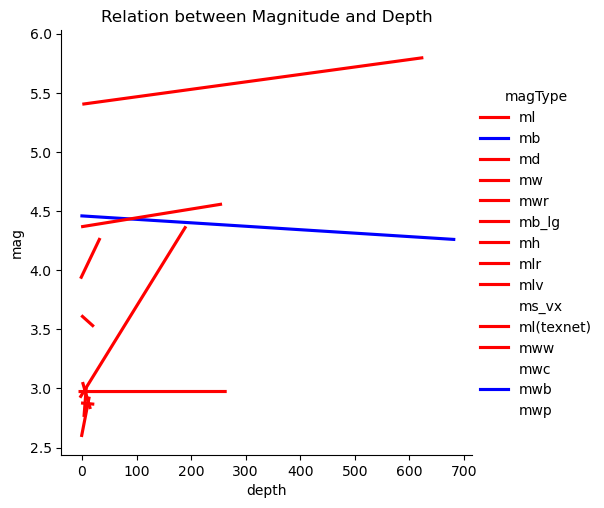

In [58]:
 seaborn.lmplot(data=df_new, x='depth', y='mag', hue='magType', scatter=False, ci=None, palette=['red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red' ]).set( 
    title="Relation between Magnitude and Depth") 


[Text(0.5, 1.0, 'Relation between Max Magnitude and Magnitude Types')]

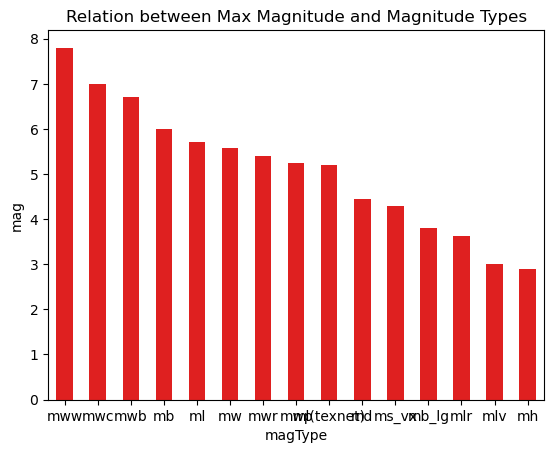

In [59]:
seaborn.barplot(data=final_df, x='magType', y='mag', errorbar=None, estimator='max', width=0.5, color='red').set(title="Relation between Max Magnitude and Magnitude Types")


[Text(0.5, 1.0, 'Relation between Magnitude and Magnitude Types')]

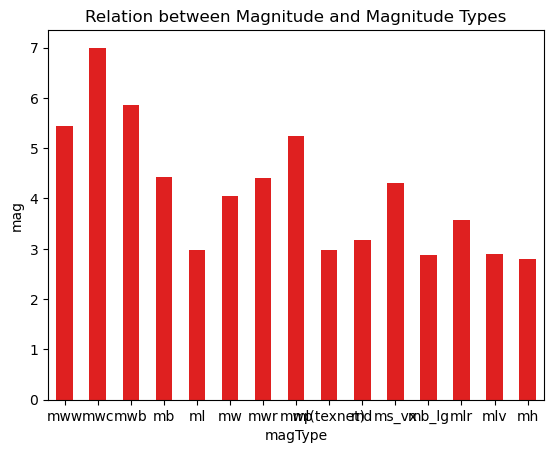

In [60]:
seaborn.barplot(data=final_df, x='magType', y='mag', errorbar=None, estimator='mean', width=0.5, color='red').set(title="Relation between Magnitude and Magnitude Types")


In [2]:
import folium

In [3]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [4]:
m1=folium.Map(width=550,height=350,location=[10, -70],zoom_start=11,min_zoom=4,max_zoom=14)
## these locations can change
fig.add_child(m1)
m1

In [5]:
## map markers
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)
# add markers to the map
folium.Marker(location=[28.695800, 77.244721],popup='Default popup Marker1',tooltip='Click here to see Popup').add_to(m3)
folium.Marker(location=[28.645800, 77.214721],popup='<strong>Marker3</strong>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[28.655800, 77.274721],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
m3